## Inference for a Gaussian model  

Family name: Dominguez

Name: Ivan

Date: 13-02-2026

### Maximum likelihood (ML) and Maximum posterior (MAP)

1. Code in a separate file called 'gaussian_distribution.py' in the 'tools' folder, without using 'scipy', a vectorized function called 'gaussian_pdf' to compute the probability density function (pdf) of 1-dimensional Gaussian.
    1. Generate a sample of size $N = 10^6$ from a normal distribution with mean $\mu = 5.0$, $\sigma = 1.0$
    2. Fit a Gaussian to these data using maximum likelihood (ML).
    3. Assume a Gaussian prior for $\mu$ centered at $0.0$ with a standard deviation $3.0$
    4. Show how the Gaussian distribution whose standard deviation is given by the ML estimate, and whose mean is the value that maximizes the posterior of $\mu$, evolves as more data instances are considered in the computation of the posterior.

Note: In the code include the appropriate docstrings (Google style) and minimal complete doctests.

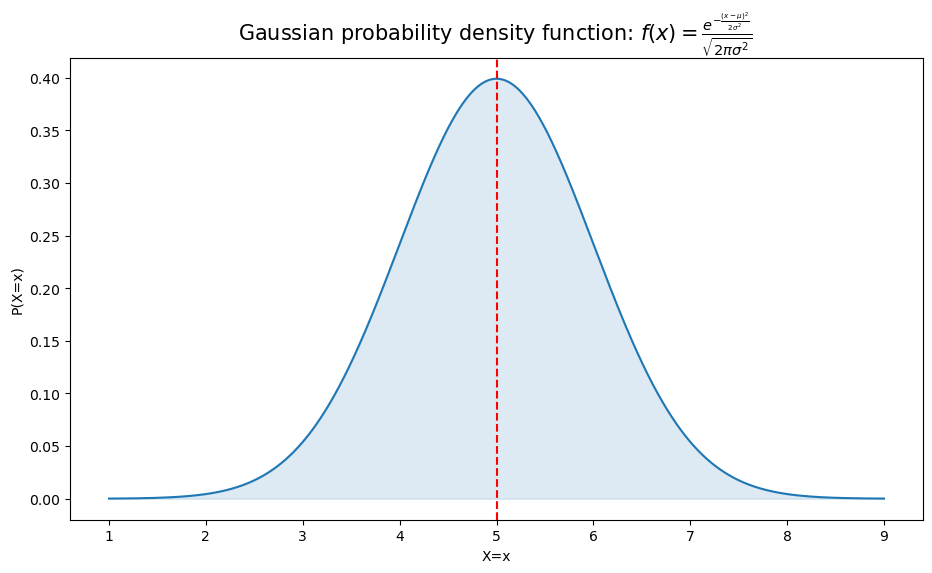

In [26]:
from tools import gaussian_distribution
import numpy as np
import matplotlib.pyplot as plt

# First we define the parameters we shall use:

N = 10**6
mu = 5.0
sigma = 1.0

# Now we define x as a vector of values between 1 
# and 9 so we can appreciate the curve of the gaussian pdf:

x = np.linspace(mu-4*sigma, mu+4*sigma, N)

# And now we calculate the probabilities associated to
# x according to gaussian_pdf:

y = gaussian_distribution.gaussian_pdf(x, mu, sigma)

# Now we plot the results: 

plt.figure(figsize=(11, 6))
plt.plot(x, y)
plt.fill_between(x, y, color='#1f77b4', alpha=0.15)
plt.axvline(mu, color='red', linestyle='--')
plt.xlabel('X=x')
plt.ylabel('P(X=x)')
plt.title('Gaussian probability density function: $f(x)= \\frac{e^{-\\frac{(x-\mu)^2}{2\sigma^2}}}{\sqrt{2 \pi \sigma^2}}$ ', fontsize=15);

In [27]:
# now, using maximum likelihood, we fit this data to a gaussian

### Multivariate Gaussian
2. Code in a separate file called 'gaussian_distribution.py' in the 'tools' folder, without using scipy, a vectorized function called called 'multivariate_gaussian_pdf'  to compute the probability density function (pdf) of K D-dimensional Gaussian.

3. For a 2D Gaussian
    1. Create a **3D plot** of the pdf of a single 2D Gaussian with $\boldsymbol{\mu}^{\top} = \begin{pmatrix} 3.0 \\ -5.0 \end{pmatrix}$, $\boldsymbol{\Sigma} = \begin{pmatrix} 1.7 & -0.8 \\ -0.8 & 0.9 \end{pmatrix}$
    3. Generate a **sample** from this distribution of size $N = 1000$.
    4. Create a **2D scatter plot** to visualize the sample.
    5. Overlay the **equiprobability ellipses** (contour lines).
    6. On the ellipse, draw the **eigenvectors** of the covariance matrix with lengths proportional to the square root of the **eigenvalues**, verifying that they correspond to the major and minor axes
    7. Use maximum likelihood (ML) to estimate the mean and the variance of this Gaussian.
 


In [ ]:
# As we did before, we define the gaussian parameters. 
# Note that they're different than before, now they're 
# for multivariate.

N = 10**3
mu = np.array([3.0, -5.0])
sigma = np.zeros((2, 2))
sigma[0][0], sigma[0][1], sigma[1][0], sigma[1][1]  = 1.7, -0.8, -0.8, 0.9

# First we create random and uniform distributed x1 and x2 vectors:
x1, x2 = np.linspace(mu[0]-4*np.sqrt(sigma[0][0]), mu[0]+4*np.sqrt(sigma[0][0]), N), np.linspace(mu[1]-4*np.sqrt(sigma[1][1]), mu[1]+4*np.sqrt(sigma[1][1]), N)
# In order to plot every point in x1x2 plane, firstly we make a grid. 
X1, X2 = np.meshgrid(x1, x2)

# And now evaluate each point in this plane using the pdf. 
Z_grid = gaussian_distribution.multivariate_gaussian_pdf(np.column_stack((X1.ravel(), X2.ravel())), mu, sigma).reshape(N, N)

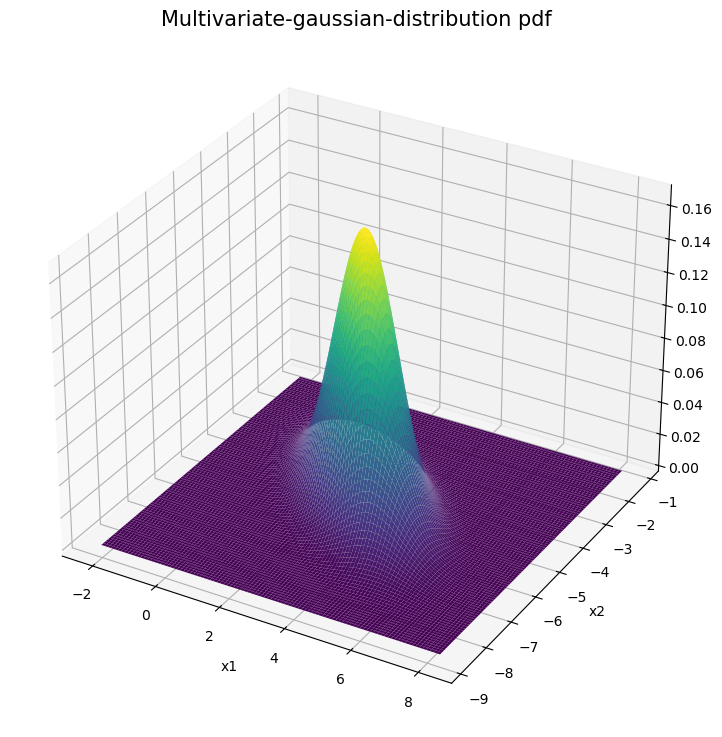

In [ ]:
# As we created the grid, plotting should be easy:

ax = plt.figure(figsize=(9, 9)).add_subplot(projection='3d')
ax.plot_surface(X1, X2, Z_grid, cmap='viridis', rcount=100, ccount=100)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.title('Multivariate-gaussian-distribution pdf', fontsize=15)
plt.show()

### The Iris dataset
4. Load the Iris dataset.
    1. Select the attributes corresponding to "sepal length" and "petal length".
    2. Center and scale the data using the StandardScalerFit, 
    3. Using ML fit a 2D Gaussian to the data.
    3. Visualize the fit.